- Scatter plot of observed TWS trend from GRACE and modelled TWS from PCR-GLOBWB
- Calculates correlation coefficient

In [19]:
%reset -f
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import theilslopes
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
from matplotlib.colors import Normalize
from scipy.stats import spearmanr

%matplotlib inline

In [24]:
#import datasets
TS_slope_grace = xr.open_dataset('/home/bauer013/ls/results_europe/masked_trends/TWS_trend_Grace_2002_2019.nc')
TS_slope_PcrGlob = xr.open_dataset('/home/bauer013/ls/results_europe/masked_trends/TWS_trend_GLOBWB_2002_2019_w5_15nonNaN_masked.nc')

In [25]:
#make them comparable (same lat and lon)
# Reorder longitudes
x = 60
TS_slope_grace['lon'] = (TS_slope_grace['lon'] + 180) % 360 - 180
TS_slope_grace['lon'] = np.concatenate([TS_slope_grace['lon'].values[x:], TS_slope_grace['lon'].values[:x]])
slope_reordered = np.concatenate([TS_slope_grace['slope'].values[:, x:], TS_slope_grace['slope'].values[:, :x]], axis=1)
intercept_reordered = np.concatenate([TS_slope_grace['intercept'].values[:, x:], TS_slope_grace['intercept'].values[:, :x]], axis=1)
TS_var3_reordered = np.concatenate([TS_slope_grace['low_slope'].values[:, x:], TS_slope_grace['low_slope'].values[:, :x]], axis=1)
TS_var4_reordered = np.concatenate([TS_slope_grace['high_slope'].values[:, x:], TS_slope_grace['high_slope'].values[:, :x]], axis=1)
TS_slope_grace['slope'] = xr.DataArray(slope_reordered, dims=('lat', 'lon'), coords={'lat': TS_slope_grace['lat'], 'lon': TS_slope_grace['lon']})
TS_slope_grace['intercept'] = xr.DataArray(intercept_reordered, dims=('lat', 'lon'), coords={'lat': TS_slope_grace['lat'], 'lon': TS_slope_grace['lon']})
TS_slope_grace['low_slope'] = xr.DataArray(TS_var3_reordered, dims=('lat', 'lon'), coords={'lat': TS_slope_grace['lat'], 'lon': TS_slope_grace['lon']})
TS_slope_grace['high_slope'] = xr.DataArray(TS_var4_reordered, dims=('lat', 'lon'), coords={'lat': TS_slope_grace['lat'], 'lon': TS_slope_grace['lon']})
TS_slope_grace['slope'] = TS_slope_grace['slope']
TS_slope_PcrGlob = TS_slope_PcrGlob.sortby('lat', ascending=True)


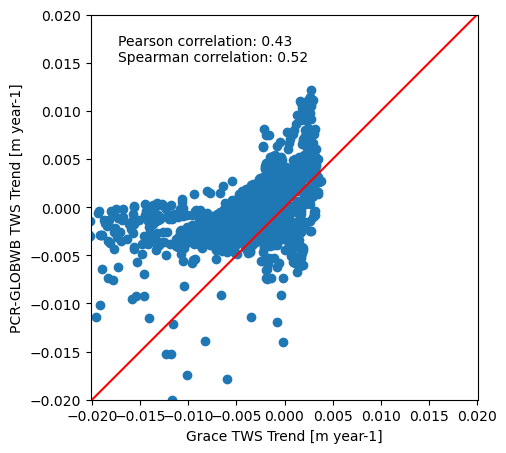

In [26]:
# Extract slope values
slope_values_TS_slope_grace = TS_slope_grace['slope'].values.flatten()
slope_values_TS_slope_PcrGlob = TS_slope_PcrGlob['slope'].values.flatten()
valid_indices = np.isnan(slope_values_TS_slope_grace) | np.isnan(slope_values_TS_slope_PcrGlob)
valid_indices = ~valid_indices 
slope_values_TS_slope_grace
# Filter arrays to exclude NaN values
slope_values_TS_slope_grace = slope_values_TS_slope_grace[valid_indices]
slope_values_TS_slope_PcrGlob  = slope_values_TS_slope_PcrGlob[valid_indices]

# Scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(TS_slope_grace['slope'], TS_slope_PcrGlob['slope'])
line_x = np.linspace(-1, 1, 100)
# Calculate the corresponding y-values for the line with slope 1
line_y = line_x
# Plot the line with slope 1
ax.plot(line_x, line_y, color='red', linestyle='-')

# Set equal scale for both axes
ax.axis('equal')

# Set custom axis limits
ax.set_xlim([-0.02, 0.02])
ax.set_ylim([-0.02, 0.02])

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(slope_values_TS_slope_grace, slope_values_TS_slope_PcrGlob)[0, 1]
#Spearman corroleation
rho_spearman, p_value_spearman = spearmanr(slope_values_TS_slope_grace, slope_values_TS_slope_PcrGlob)

# Set labels for x and y axes
plt.xlabel('Grace TWS Trend [m year-1]')
plt.ylabel('PCR-GLOBWB TWS Trend [m year-1]')

# Set plot title with correlation coefficient
textstr = f'Pearson correlation: {correlation_coefficient:.2f}\nSpearman correlation: {rho_spearman:.2f}'
# Place the text box in the plot
props = dict(boxstyle='round', facecolor='white', alpha=0.0)
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
#ax.text(0.45, 0.12, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
# Show the plot
plt.show()

